<a href="https://colab.research.google.com/github/adityamavle/mimic-los-prediction/blob/master/Mimic_Cleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('mimic3d.csv')
print(df.head())
print(df.info())

   hadm_id gender  age  LOSdays admit_type             admit_location  \
0   100001      F   35     6.17  EMERGENCY  CLINIC REFERRAL/PREMATURE   
1   100003      M   59     4.04  EMERGENCY       EMERGENCY ROOM ADMIT   
2   100006      F   48    12.04  EMERGENCY       EMERGENCY ROOM ADMIT   
3   100007      F   73     7.29  EMERGENCY       EMERGENCY ROOM ADMIT   
4   100009      M   60     4.88  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   

            AdmitDiagnosis insurance           religion marital_status  ...  \
0    DIABETIC KETOACIDOSIS   Private  PROTESTANT QUAKER       DIVORCED  ...   
1           UPPER GI BLEED   Private      NOT SPECIFIED         SINGLE  ...   
2               COPD FLARE   Private      NOT SPECIFIED         SINGLE  ...   
3        BOWEL OBSTRUCTION   Private             JEWISH        MARRIED  ...   
4  CORONARY ARTERY DISEASE   Private           CATHOLIC        MARRIED  ...   

  NumMicroLabs  NumNotes  NumOutput  NumRx NumProcEvents  NumTransfers  \
0         0.

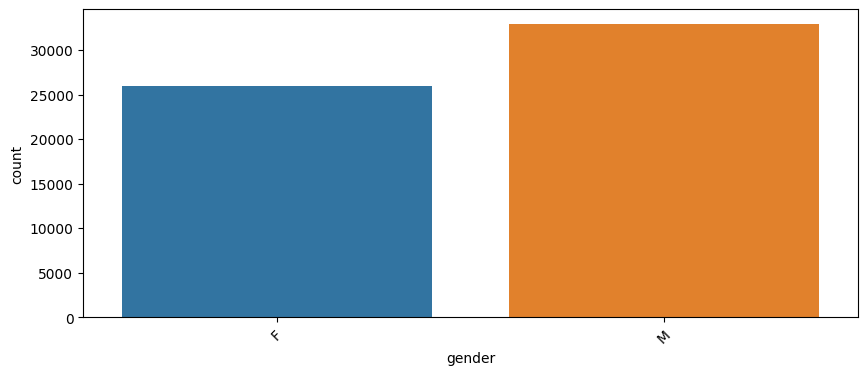

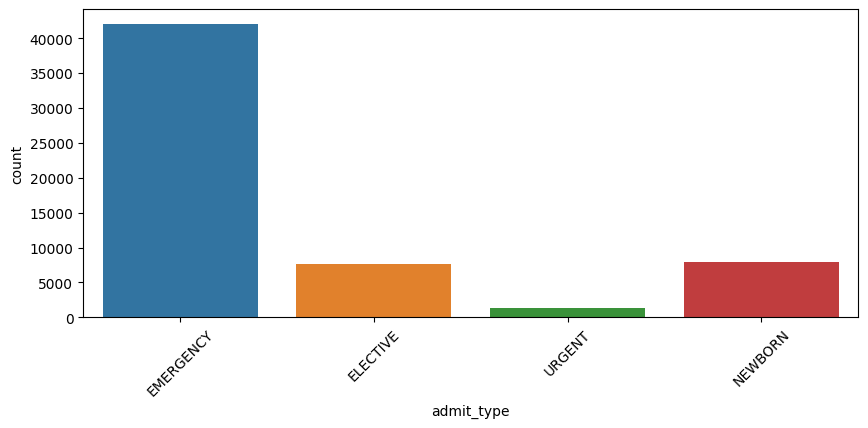

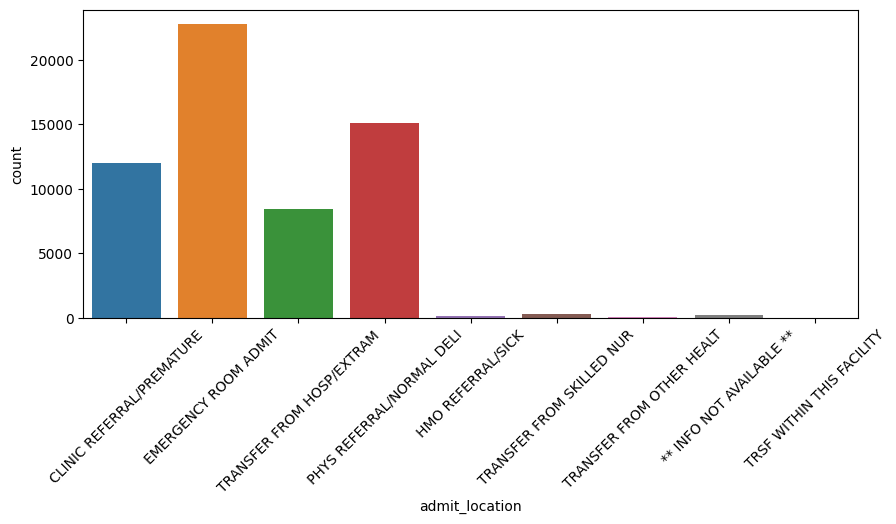

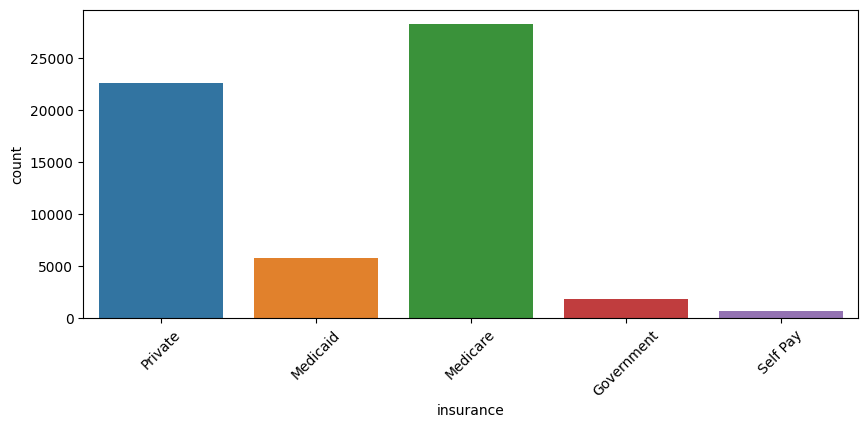

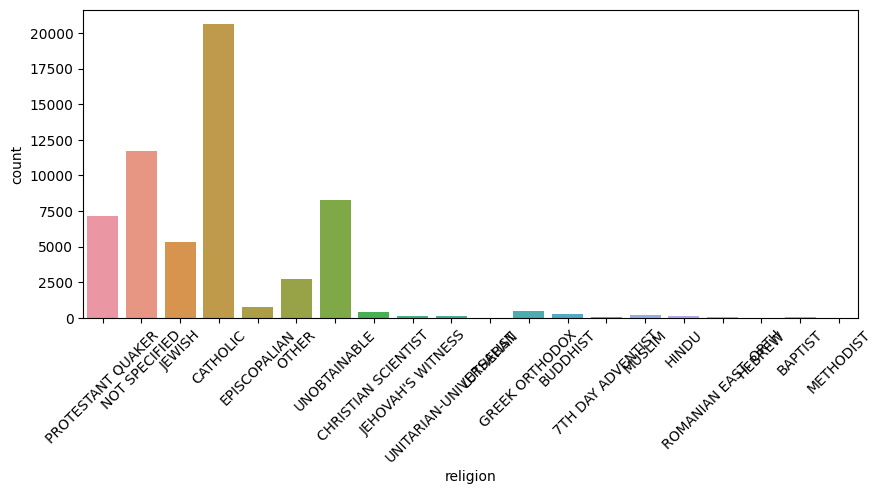

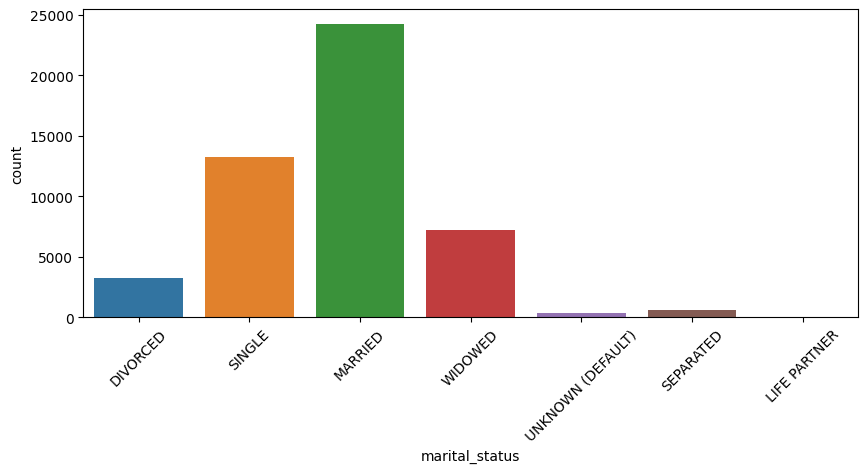

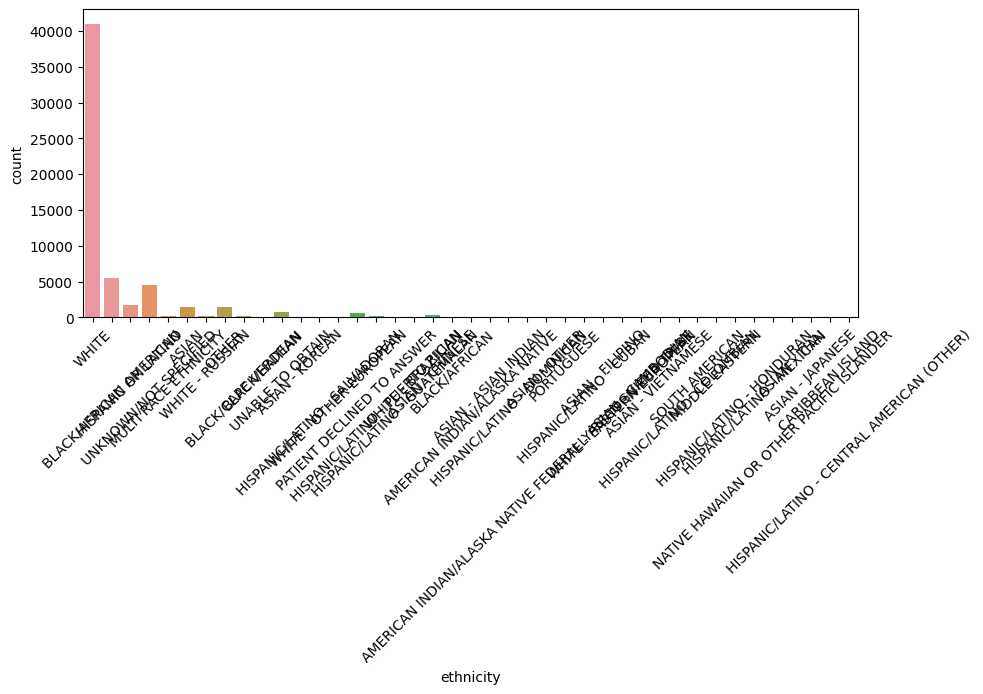

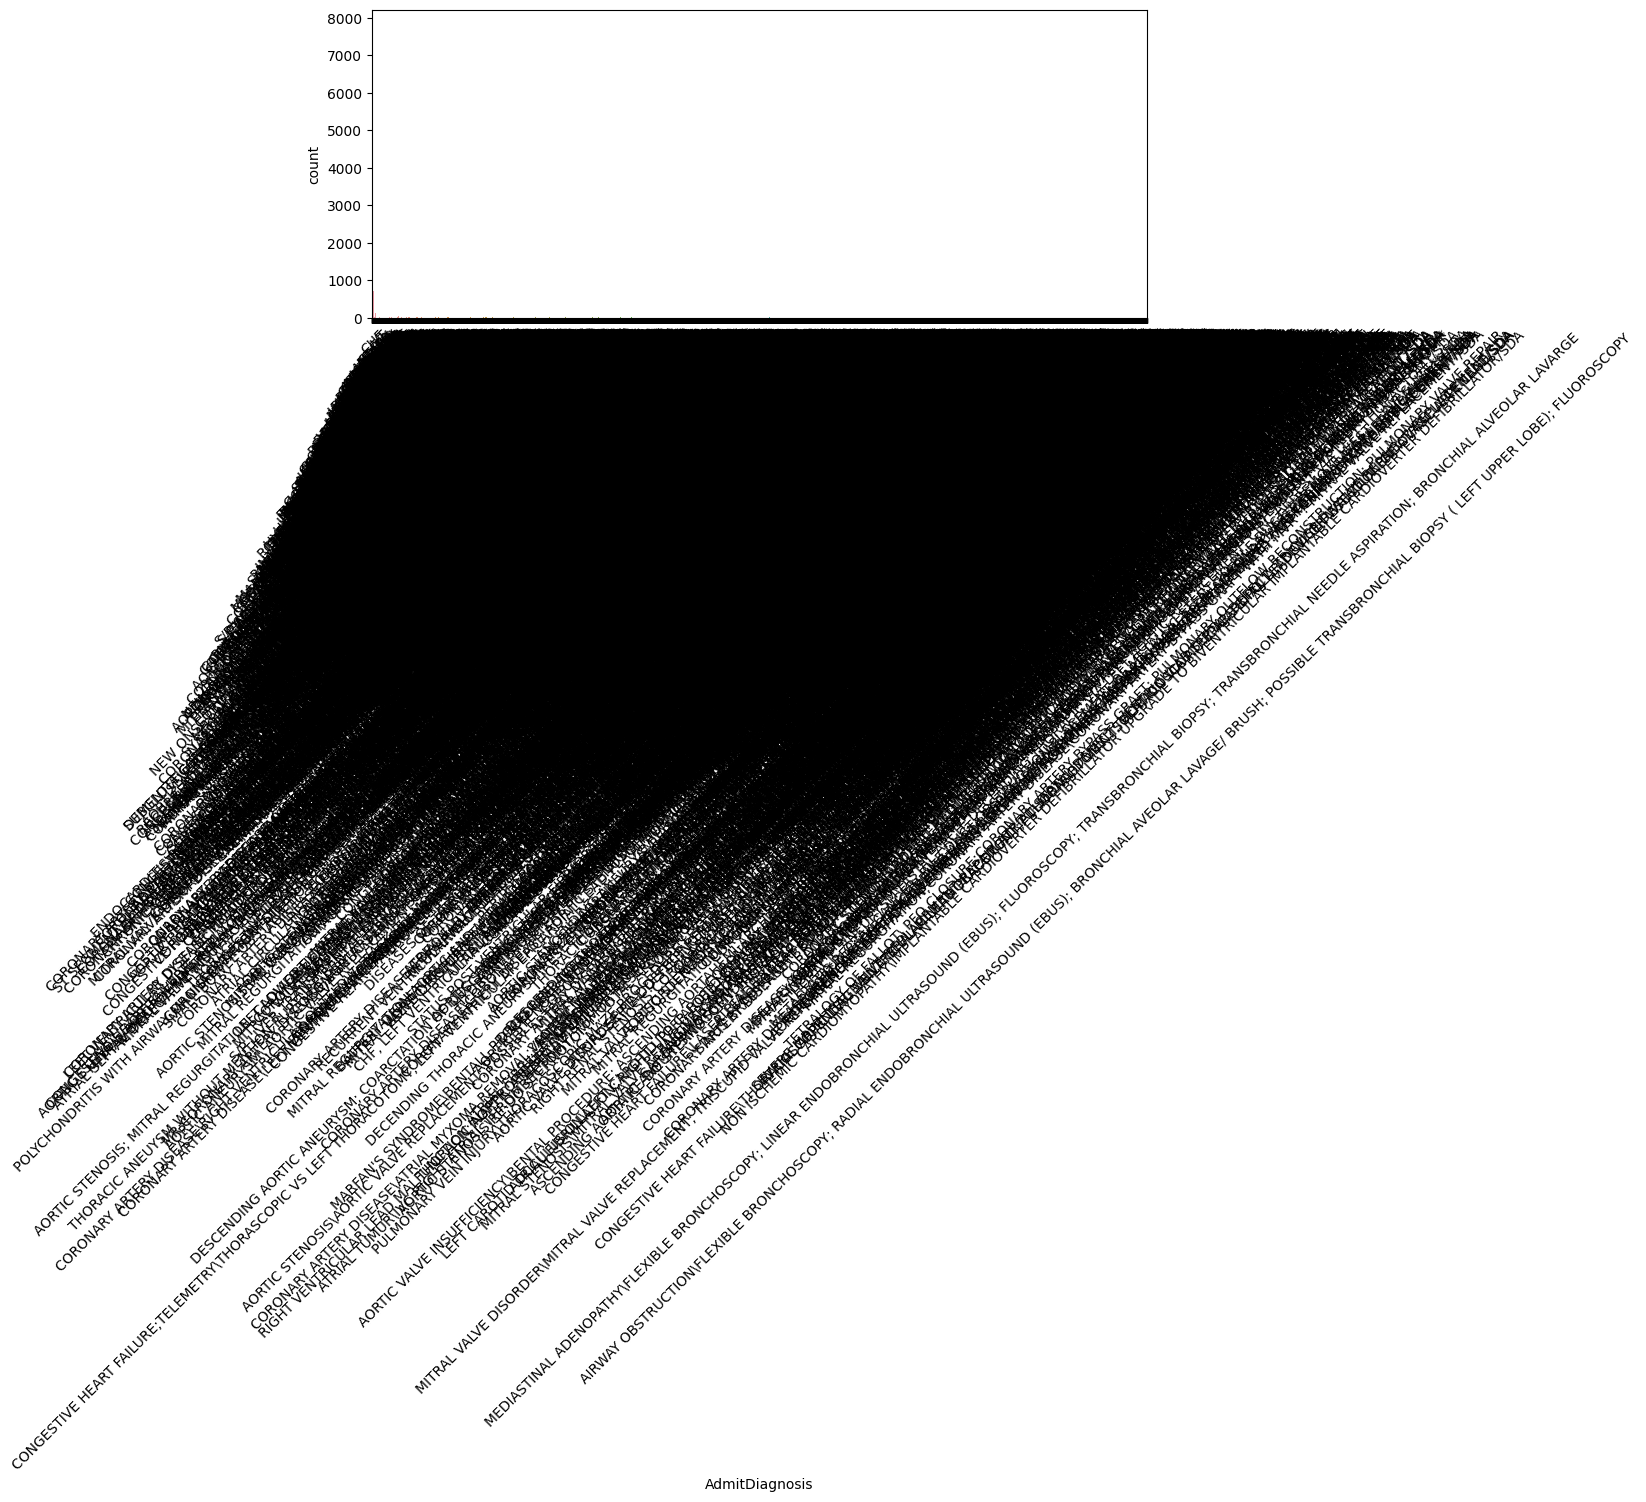

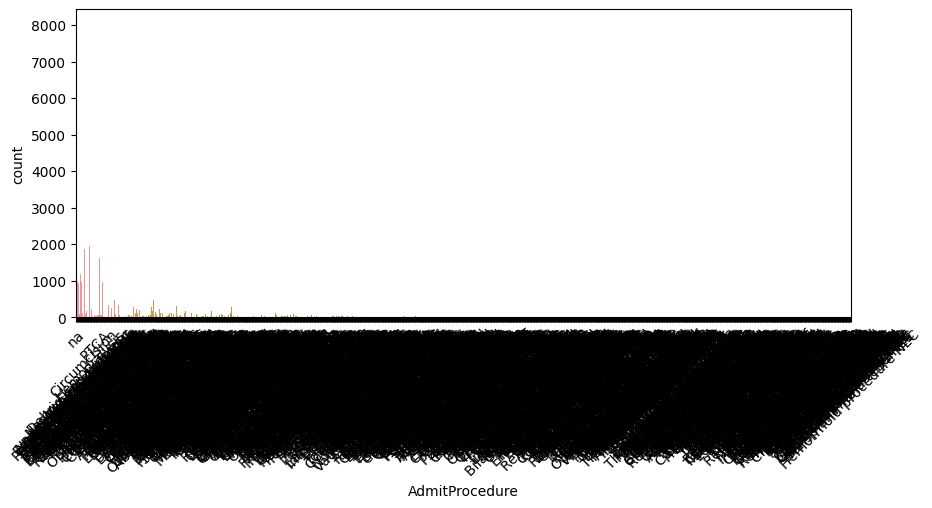

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['gender', 'admit_type', 'admit_location', 'insurance', 'religion', 'marital_status', 'ethnicity', 'AdmitDiagnosis', 'AdmitProcedure']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()


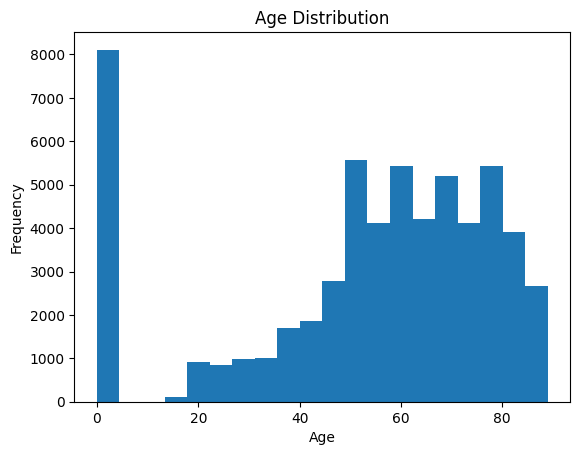

In [4]:
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-5-985e2710ba4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


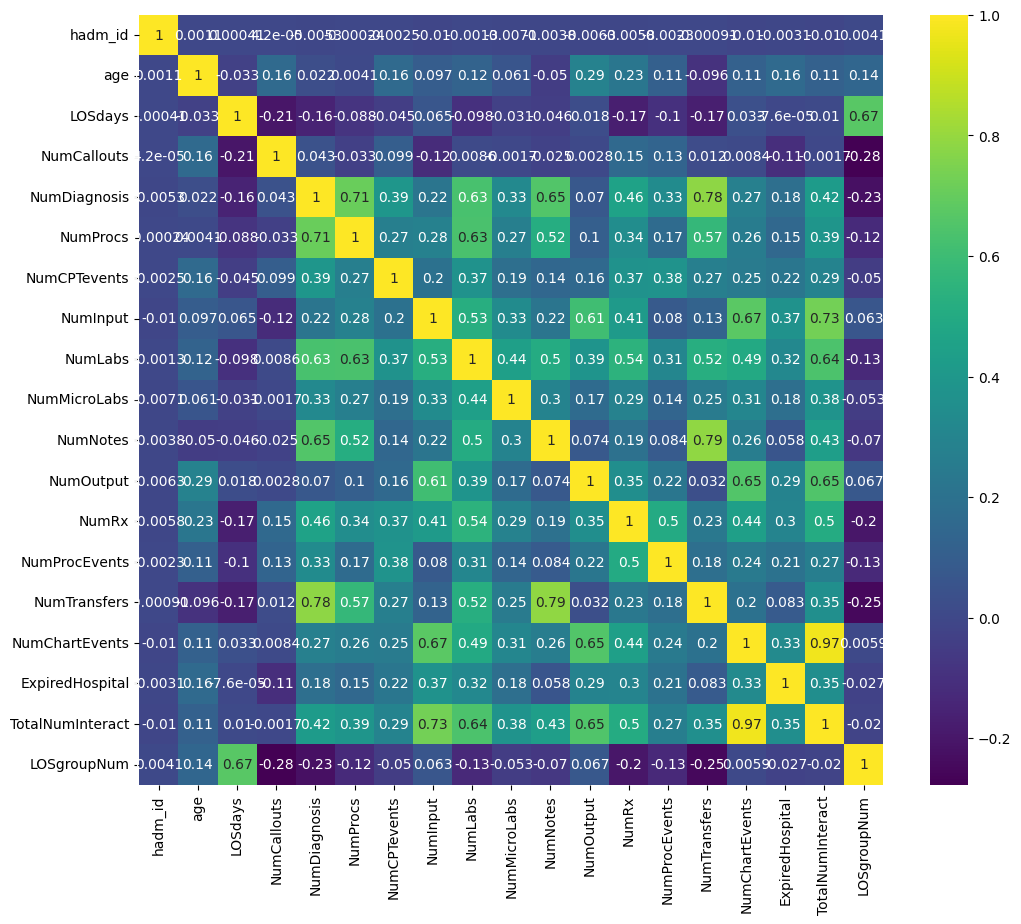

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

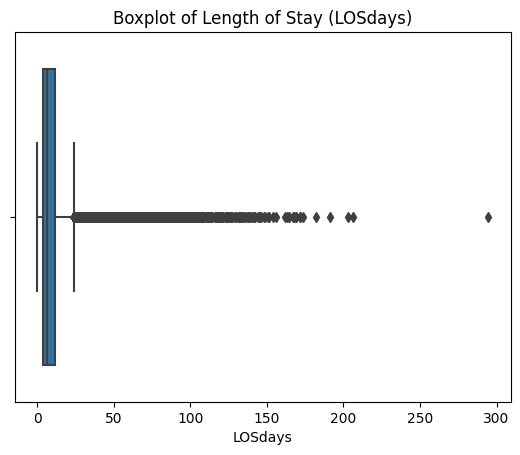

In [6]:
sns.boxplot(x=df['LOSdays'])
plt.title('Boxplot of Length of Stay (LOSdays)')
plt.show()

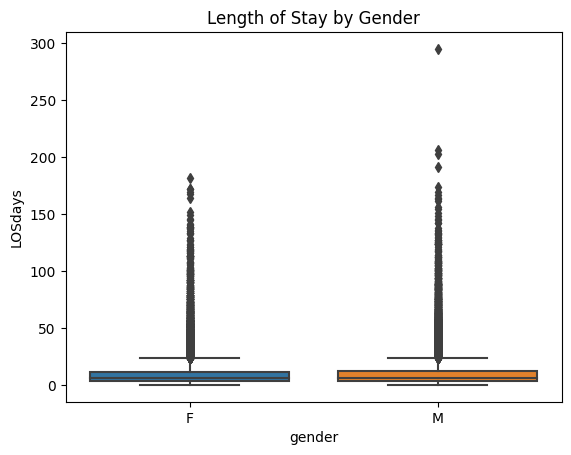

In [7]:
sns.boxplot(x='gender', y='LOSdays', data=df)
plt.title('Length of Stay by Gender')
plt.show()

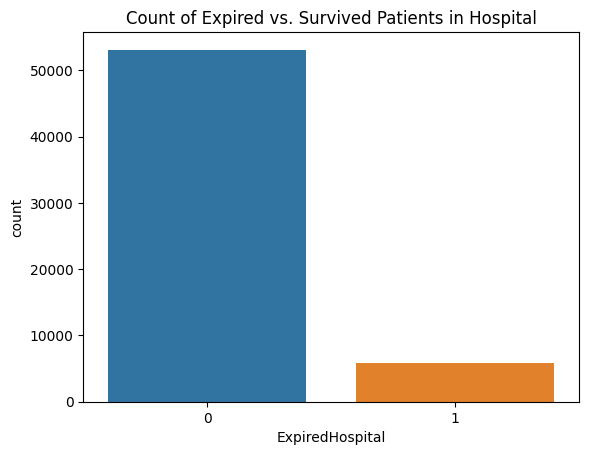

In [8]:
sns.countplot(x='ExpiredHospital', data=df)
plt.title('Count of Expired vs. Survived Patients in Hospital')
plt.show()

In [9]:
df.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1


In [10]:
unique_los_values = df['LOSdays'].nunique()
print(unique_los_values)

1884


In [12]:
null_values = df.isnull().sum()
print(null_values)

hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         25
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64


In [14]:
unique_los_values = df['marital_status'].unique()
print(unique_los_values)

['DIVORCED' 'SINGLE' 'MARRIED' nan 'WIDOWED' 'UNKNOWN (DEFAULT)'
 'SEPARATED' 'LIFE PARTNER']


In [19]:
df['marital_status'] = df['marital_status'].fillna('UNKNOWN (DEFAULT)')
unique_los_values = df['marital_status'].unique()
print(unique_los_values)



['DIVORCED' 'SINGLE' 'MARRIED' 'UNKNOWN (DEFAULT)' 'WIDOWED' 'SEPARATED'
 'LIFE PARTNER']
['PROTESTANT QUAKER' 'NOT SPECIFIED' 'JEWISH' 'CATHOLIC' 'EPISCOPALIAN'
 'OTHER' 'UNOBTAINABLE' 'CHRISTIAN SCIENTIST' nan "JEHOVAH'S WITNESS"
 'UNITARIAN-UNIVERSALIST' 'LUTHERAN' 'GREEK ORTHODOX' 'BUDDHIST'
 '7TH DAY ADVENTIST' 'MUSLIM' 'HINDU' 'ROMANIAN EAST. ORTH' 'HEBREW'
 'BAPTIST' 'METHODIST']


In [20]:
df['religion'] = df['religion'].fillna('NOT SPECIFIED')
unique_rel_values = df['religion'].unique()
print(unique_rel_values)

['PROTESTANT QUAKER' 'NOT SPECIFIED' 'JEWISH' 'CATHOLIC' 'EPISCOPALIAN'
 'OTHER' 'UNOBTAINABLE' 'CHRISTIAN SCIENTIST' "JEHOVAH'S WITNESS"
 'UNITARIAN-UNIVERSALIST' 'LUTHERAN' 'GREEK ORTHODOX' 'BUDDHIST'
 '7TH DAY ADVENTIST' 'MUSLIM' 'HINDU' 'ROMANIAN EAST. ORTH' 'HEBREW'
 'BAPTIST' 'METHODIST']


In [23]:
df = df.dropna()
null_values = df.isnull().sum()
print(null_values)

hadm_id             0
gender              0
age                 0
LOSdays             0
admit_type          0
admit_location      0
AdmitDiagnosis      0
insurance           0
religion            0
marital_status      0
ethnicity           0
NumCallouts         0
NumDiagnosis        0
NumProcs            0
AdmitProcedure      0
NumCPTevents        0
NumInput            0
NumLabs             0
NumMicroLabs        0
NumNotes            0
NumOutput           0
NumRx               0
NumProcEvents       0
NumTransfers        0
NumChartEvents      0
ExpiredHospital     0
TotalNumInteract    0
LOSgroupNum         0
dtype: int64


In [24]:
print(df.dtypes)

hadm_id               int64
gender               object
age                   int64
LOSdays             float64
admit_type           object
admit_location       object
AdmitDiagnosis       object
insurance            object
religion             object
marital_status       object
ethnicity            object
NumCallouts         float64
NumDiagnosis        float64
NumProcs            float64
AdmitProcedure       object
NumCPTevents        float64
NumInput            float64
NumLabs             float64
NumMicroLabs        float64
NumNotes            float64
NumOutput           float64
NumRx               float64
NumProcEvents       float64
NumTransfers        float64
NumChartEvents      float64
ExpiredHospital       int64
TotalNumInteract    float64
LOSgroupNum           int64
dtype: object


In [28]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values")

Index(['gender', 'admit_type', 'admit_location', 'AdmitDiagnosis', 'insurance',
       'religion', 'marital_status', 'ethnicity', 'AdmitProcedure'],
      dtype='object')
Column 'gender' has 2 unique values
Column 'admit_type' has 4 unique values
Column 'admit_location' has 9 unique values
Column 'AdmitDiagnosis' has 15691 unique values
Column 'insurance' has 5 unique values
Column 'religion' has 20 unique values
Column 'marital_status' has 7 unique values
Column 'ethnicity' has 41 unique values
Column 'AdmitProcedure' has 1276 unique values


In [29]:
df['AdmitDiagnosis']

0          DIABETIC KETOACIDOSIS
1                 UPPER GI BLEED
2                     COPD FLARE
3              BOWEL OBSTRUCTION
4        CORONARY ARTERY DISEASE
                  ...           
58971    CORONARY ARTERY DISEASE
58972      MENTAL STATUS CHANGES
58973               ROOT ABSCESS
58974    CORONARY ARTERY DISEASE
58975                  PNEUMONIA
Name: AdmitDiagnosis, Length: 58951, dtype: object

In [30]:
df['AdmitProcedure']

0                              na
1         Endosc control gast hem
2          Non-invasive mech vent
3        Part sm bowel resect NEC
4        Aortocor bypas-3 cor art
                   ...           
58971    Aortcor bypas-4+ cor art
58972    Cont inv mec ven <96 hrs
58973    Opn/oth rep aort vlv-tis
58974    Aortocor bypas-2 cor art
58975               Thoracentesis
Name: AdmitProcedure, Length: 58951, dtype: object